In [2]:
# We use pruning to increase the accuracy of the decision tree (pruning basically cuts the decision tree)

In [3]:
# two types of pruning : - pre and post

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#dont need user id and gender so:
dataset = dataset.drop(columns=["User ID","Gender"])
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
x_input = dataset.iloc[:,:-1]
y_output = dataset["Purchased"]

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(x_input)

StandardScaler()

In [10]:
ar = sc.transform(x_input)

x_input = pd.DataFrame(ar,columns=x_input.columns)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_input,y_output,test_size=0.2,random_state=40)

# Decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
dt.score(x_test,y_test)*100

88.75

In [16]:
dt.score(x_train,y_train)*100

99.375

In [18]:
#accuracy of training is 99% but accuracy of testing is 88% 
# which means out model is over fitted


In [27]:
from mlxtend.plotting import plot_decision_regions

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

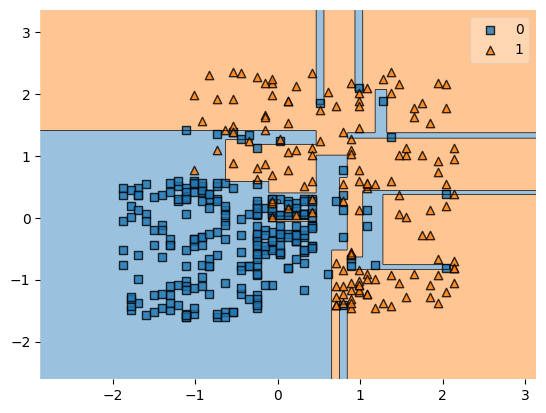

In [28]:
plot_decision_regions(x_input.to_numpy(),y_output.to_numpy(),clf=dt)

In [19]:
#lets solve this using pre-pruning :
# for pruning we use max-depth

# Pre Pruning

In [20]:
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
dt1.score(x_test,y_test)*100

92.5

In [22]:
dt1.score(x_train,y_train)*100

93.4375

In [23]:
# we can see that the accuracy of the decision tree increased and also the issue of overfitting is solved

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

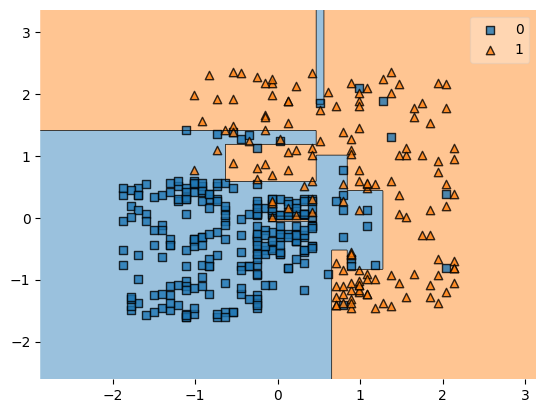

In [25]:
plot_decision_regions(x_input.to_numpy(),y_output.to_numpy(),clf=dt1)

In [29]:
#the increased accuracy can be seen in the decision region

# Plotting tree

In [30]:
from sklearn.tree import plot_tree

In [31]:
#Before pruning

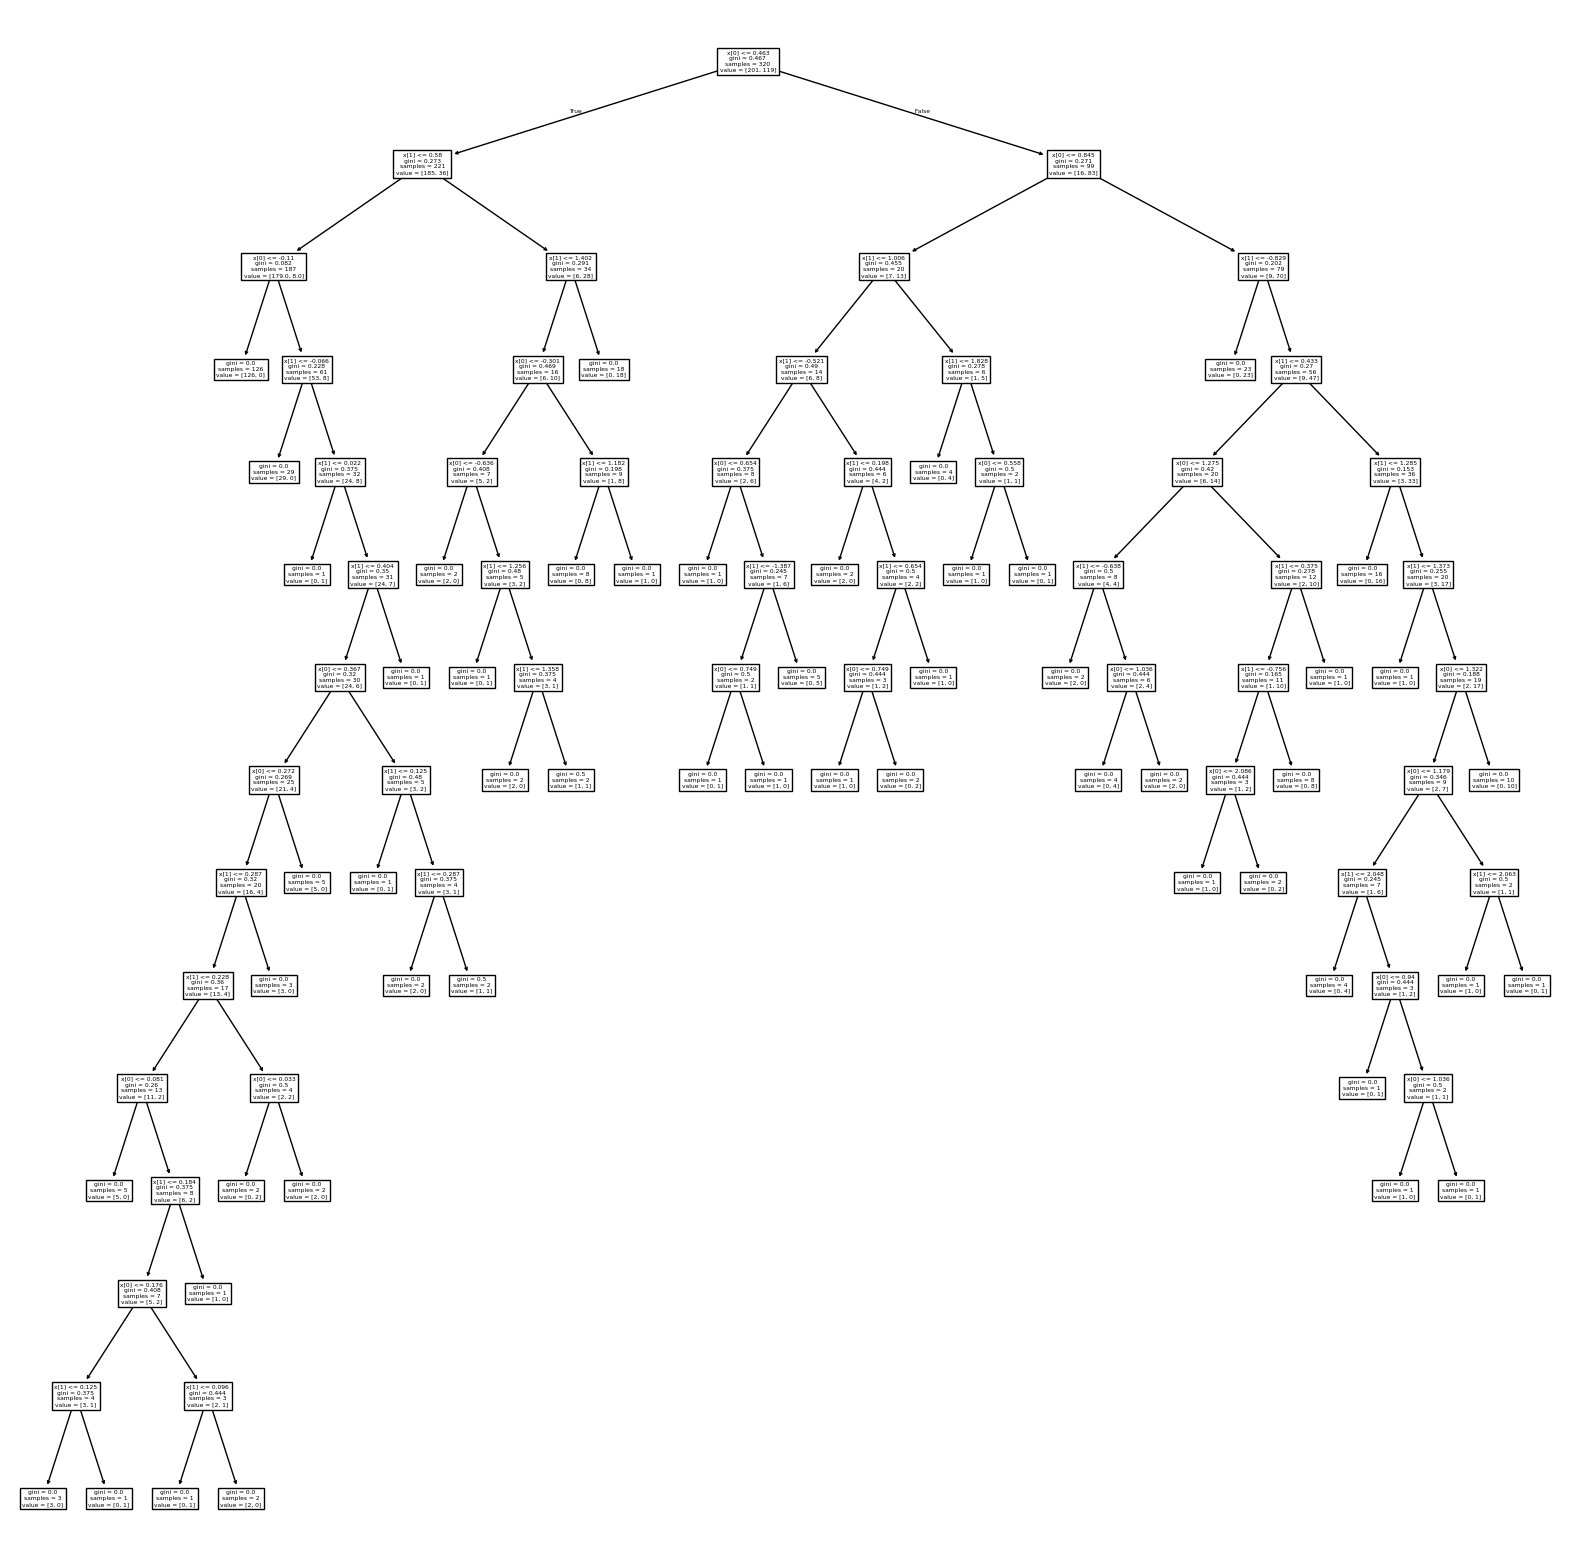

In [32]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.savefig("dt.jpg")
plt.show()

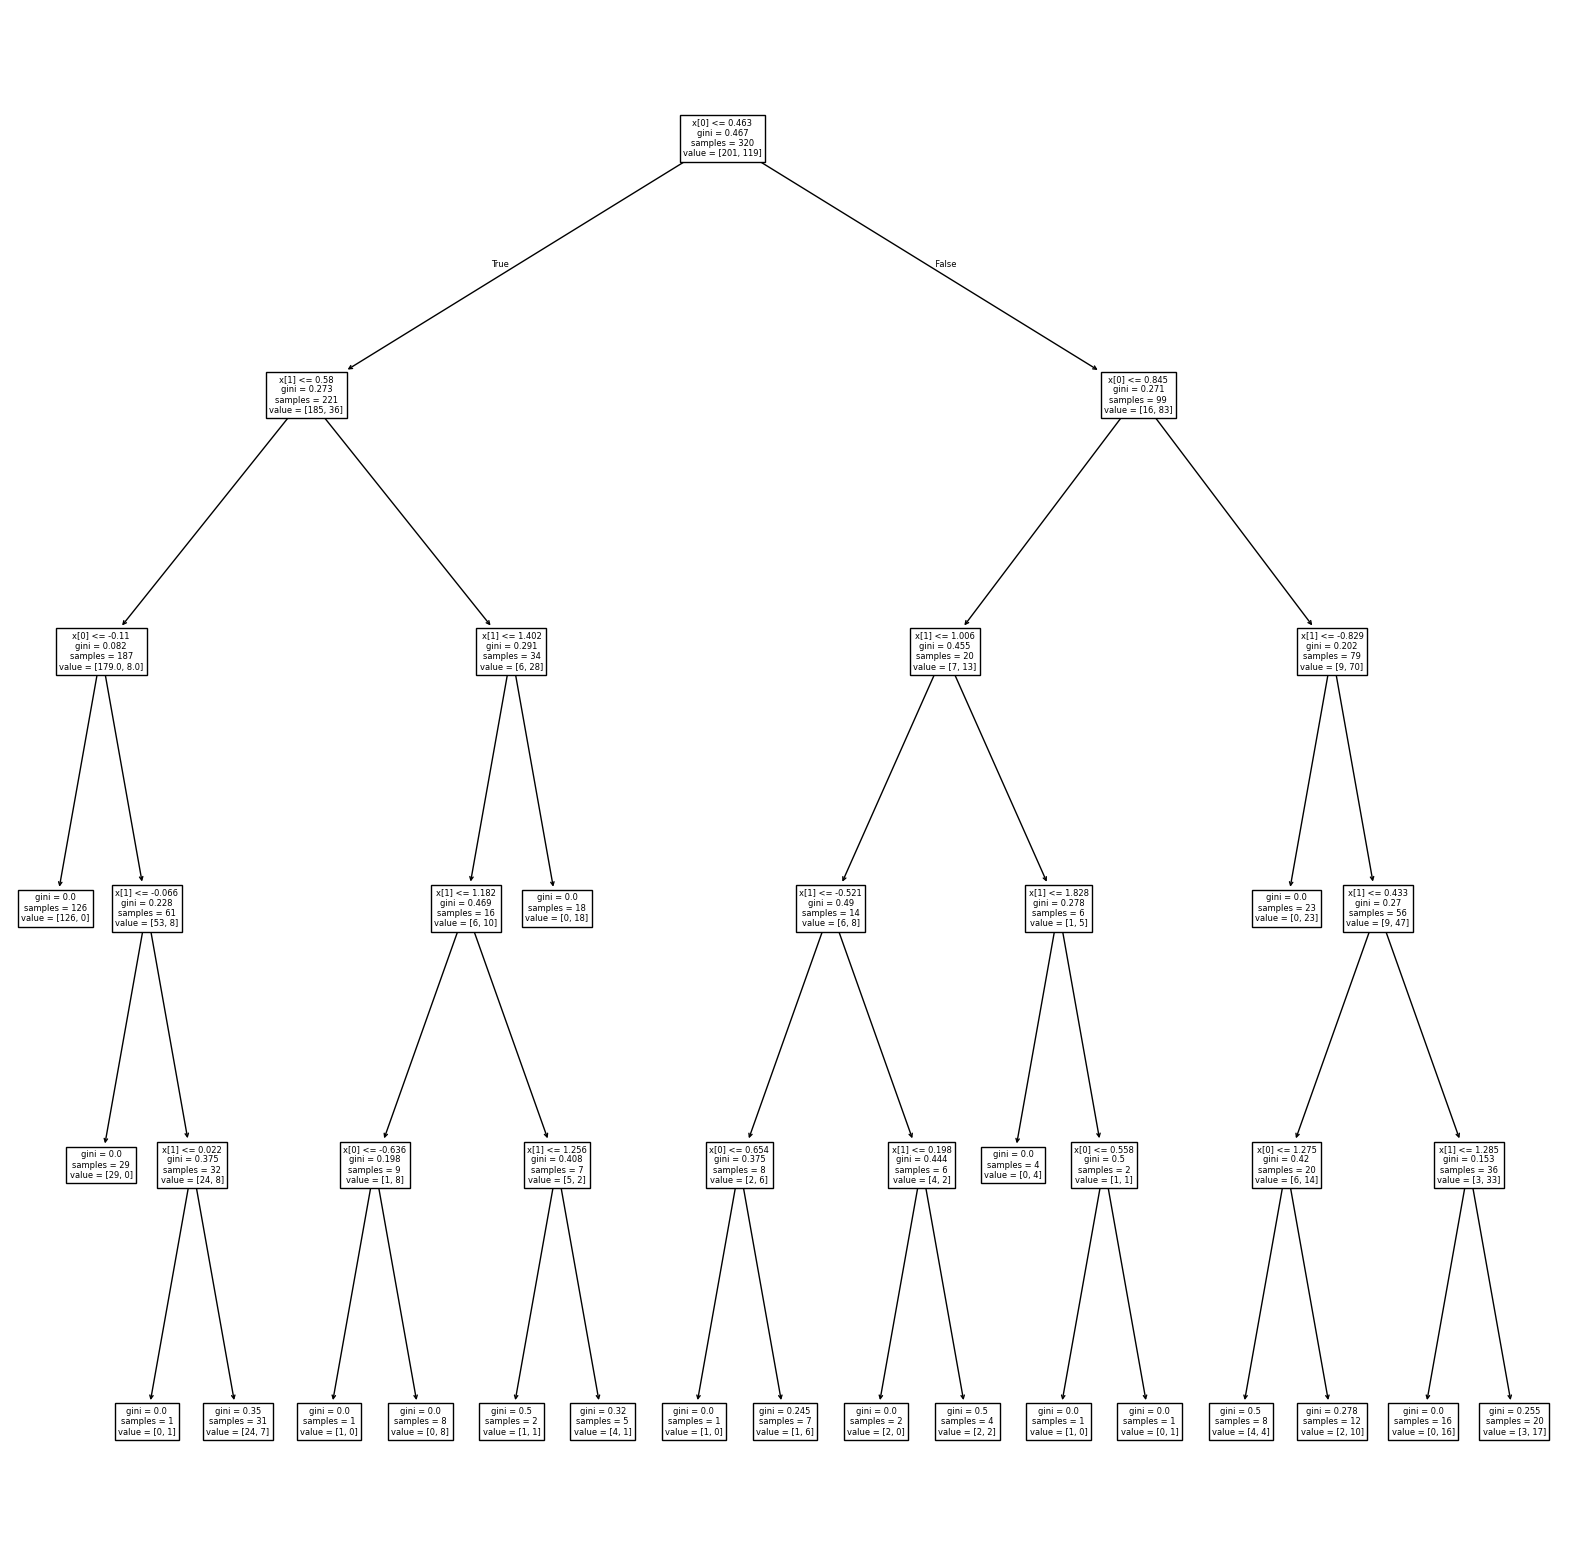

In [34]:
#After Pruning:
plt.figure(figsize=(20,20))
plot_tree(dt1)
plt.savefig("dt.jpg")
plt.show()

# Post Pruning

In [35]:
#in post pruning we check the accuracy and overfitting by using a loop
#the loops fits the model for differtent max-depths and gives the output ;
# based on the output we decide the value for max-depth:

In [45]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_test,y_test)*100,"<->",dt2.score(x_train,y_train)*100, "| max_depth=",i)

85.0 <-> 83.75 | max_depth= 1
93.75 <-> 90.625 | max_depth= 2
93.75 <-> 90.625 | max_depth= 3
93.75 <-> 92.1875 | max_depth= 4
92.5 <-> 93.4375 | max_depth= 5
88.75 <-> 95.625 | max_depth= 6
90.0 <-> 96.875 | max_depth= 7
90.0 <-> 97.5 | max_depth= 8
90.0 <-> 97.8125 | max_depth= 9
90.0 <-> 97.8125 | max_depth= 10
90.0 <-> 98.75 | max_depth= 11
90.0 <-> 98.75 | max_depth= 12
90.0 <-> 98.75 | max_depth= 13
88.75 <-> 99.0625 | max_depth= 14
88.75 <-> 99.375 | max_depth= 15
88.75 <-> 99.375 | max_depth= 16
88.75 <-> 99.375 | max_depth= 17
88.75 <-> 99.375 | max_depth= 18
88.75 <-> 99.375 | max_depth= 19


In [46]:
# from above output we can see that max-depth=5 will be the best option